# Earth Density Models

Test models of Earth density and electron fraction built into ASTERIA.

In [1]:
from astropy import units as u

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from asteria.matter import PREM, SimpleEarth

## Density vs. Radial Distance

Compute radial distance and calculate the Earth's density using the PREM model and a layered approximation to PREM in which the density is treated as constant in each layer.

In [2]:
r = np.linspace(0, 6370.99, 6372) * u.km
prem = PREM()
earth = SimpleEarth()

rho = prem.density(r)
rho_c = earth.density(r)

### Plot Density Layers

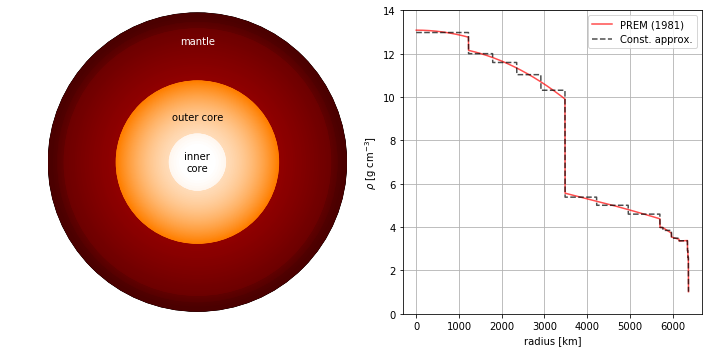

In [3]:
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(10,5))
patches = []
colors = []

for r1 in (np.linspace(6371, 3, 1000) * u.km):
    c = mpl.patches.Circle((0,0), r1.value)
    patches.append(c)
    colors.append(prem.density(r1).value)
    
p = mpl.collections.PatchCollection(patches)
p.set_array(np.asarray(colors))
p.set_clim(1, 13)
p.set_cmap('gist_heat')
ax0.add_collection(p)
ax0.set(aspect='equal',
        xlim=(-6371., 6371.),
        ylim=(-6371., 6371.))
ax0.axis('off')
ax0.text(0,0, 'inner\ncore', horizontalalignment='center', verticalalignment='center')
ax0.text(0,1800, 'outer core', horizontalalignment='center')
ax0.text(0,5000, 'mantle', horizontalalignment='center', color='w')

ax1.plot(r, rho, 'r-', label='PREM (1981)', alpha=0.7)
ax1.plot(r, rho_c, 'k--', label='Const. approx.', alpha=0.7)
ax1.set(xlabel='radius [km]',
        ylabel=r'$\rho$ [g cm$^{-3}$]',
        ylim=(0,14))
ax1.legend()
ax1.grid()

fig.tight_layout()

## Electron Fraction vs. Radial Distance

Plot electron fraction $Y_{e}$ as a function of radial distance from the core.

In [4]:
y_e = prem.y_e(r)
y_e_c = earth.y_e(r)

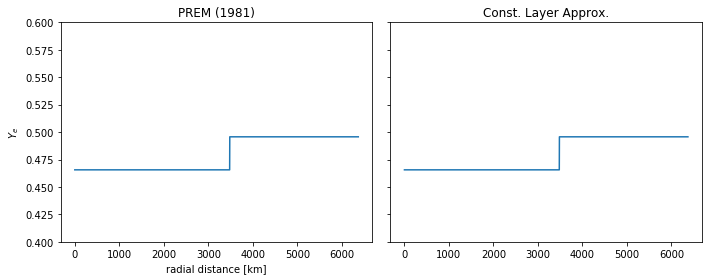

In [5]:
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)

ax0.plot(r, y_e)
ax0.set(xlabel='radial distance [km]',
        ylabel='$Y_e$',
        ylim=(0.4,0.6),
        title='PREM (1981)')

ax1.plot(r, y_e_c)
ax1.set(title='Const. Layer Approx.')

fig.tight_layout()